In [1]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.0 MB/s eta 0:00:00


In [2]:
pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/mulcam_bigdata/세미프로젝트/data

/content/drive/MyDrive/mulcam_bigdata/세미프로젝트/data


In [4]:
pwd

'/content/drive/MyDrive/mulcam_bigdata/세미프로젝트/data'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


path = pd.read_csv("../data/가구유형별소득소비지출현황.csv", encoding='cp949')
path
df = pd.DataFrame(path)
df


,년도,가계수지항목,소비지출(천원),식료품·비주류음료,주류·담배,의류·신발,주거·수도·광열,가정용품·가사서비스,보건,교통,통신,오락·문화,교육,음식·숙박,기타상품서비스
0,2019,전체가구,2295,14.4,1.5,5.8,11.4,5.0,9.0,12.6,4.9,6.8,6.6,13.6,8.6
1,2019,1인가구,1308,13.5,2.2,5.0,18.2,4.8,9.0,12.2,4.0,6.4,1.8,15.0,8.0
2,2020,전체가구,2295,16.4,1.6,4.8,12.3,5.7,9.6,12.2,4.9,5.6,5.8,12.7,8.6
3,2020,1인가구,1268,15.2,2.2,4.6,19.3,4.7,9.6,10.5,4.3,5.8,1.2,15.1,7.5
4,2021,전체가구,2380,16.3,1.6,4.9,12.2,5.4,9.3,12.0,4.8,5.5,6.2,13.0,8.5
5,2021,1인가구,1361,15.0,2.3,4.6,18.9,4.8,9.0,10.6,4.3,5.9,1.3,16.0,7.9
6,2022,전체가구,2484,15.7,1.5,5.0,11.8,4.6,9.4,12.2,4.7,5.9,6.6,14.3,8.2
7,2022,1인가구,1461,14.2,2.1,4.9,18.1,4.4,9.1,10.9,4.1,6.3,1.5,17.0,7.7
8,2023,전체가구,2651,14.9,1.4,4.9,12.2,4.5,9.1,12.4,4.4,6.9,6.4,14.6,8.2
9,2023,1인가구,1557,13.6,2.1,4.9,18.3,4.1,8.9,10.9,3.9,7.1,1.5,16.7,8.0


In [6]:
path_금액 = pd.read_csv("../data/가구유형별소득소비지출금액.csv")
path_금액
df_금액 = pd.DataFrame(path_금액)
df_금액

,년도,가계수지항목,소비지출,식료품음료구입,주류담배구입,의류신발구입,주거수도광열비,가정용품가사서비스이용,보건제품구입,교통비,통신비,오락문화비,교육비,음식숙박비,기타상품서비스이용
0,2019,전체가구,2294545,330163,34241,131953,261760,113575,206698,287754,112556,155304,151169,311318,198050
1,2019,1인가구,1307691,175818,28626,66339,237834,62826,118033,160438,51662,83652,22715,195412,104332
2,2020,전체가구,2294703,376312,36077,110233,282187,130262,219874,279250,111928,129164,131572,291192,196648
3,2020,1인가구,1267818,192714,28446,57543,244525,59014,122046,133018,55401,73450,14802,191942,94912
4,2021,전체가구,2379894,388651,37719,117356,292074,128857,223207,286067,114891,130236,148275,310994,201562
5,2021,1인가구,1360988,204345,31483,62391,257078,64682,121820,144317,59044,80112,16504,211781,107427
6,2022,전체가구,2484244,389564,37535,124142,294624,114133,233825,302091,116984,147422,164532,356781,202607
7,2022,1인가구,1461217,207640,32405,70884,264540,64146,134451,159293,60068,92003,22372,240916,112494
8,2023,전체가구,2650865,394255,37021,129684,324096,119594,241749,327989,117431,182923,169667,388451,217999
9,2023,1인가구,1557413,211686,32109,76137,284772,64320,138641,169453,61236,109570,24248,260120,125116


가구 유형을 입력하세요 (전체가구 또는 1인가구): 1인가구
카테고리를 입력하세요 (식료품음료구입,주류담배구입,의류신발구입,주거수도광열비,가정용품가사서비스이용,보건제품구입,교통비,통신비,오락문화비,교육비,음식숙박비,기타상품서비스이용 중 입력): 교통비


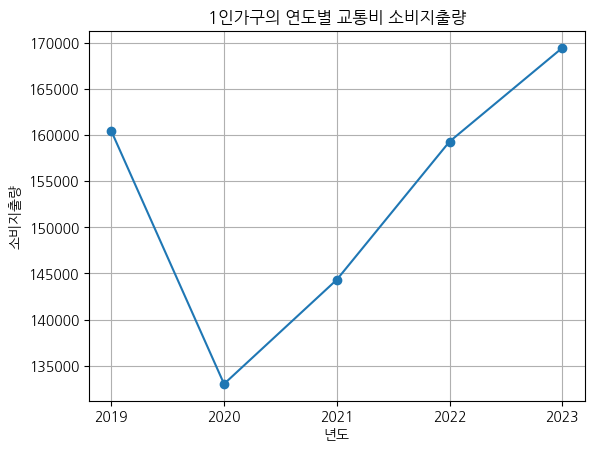

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_expenses_by_category(df, household_type, category):
    # 가구 유형과 카테고리에 해당하는 데이터 필터링
    filtered_data = df[(df['가계수지항목'] == household_type) & (df['가계수지항목'] != '전체가구') & (df['소비지출'])][category]

    # 연도별 소비지출량 계산
    years = df['년도'].unique()
    expenses_by_year = {}
    for year in years:
        year_data = df[(df['년도'] == year) & (df['가계수지항목'] == household_type)]
        total_expense = year_data.sum(axis=0)[category]
        expenses_by_year[year] = total_expense

    # 꺽은선 그래프 그리기
    plt.plot(list(expenses_by_year.keys()), list(expenses_by_year.values()), marker='o')

    # 그래프 스타일 및 레이블 설정
    plt.title(f'{household_type}의 연도별 {category} 소비지출량')
    plt.xlabel('년도')
    plt.ylabel('소비지출량')
    plt.grid(True)

    # 가로축 눈금을 1년 단위로 설정
    plt.xticks(range(min(years), max(years)+1, 1))

    # 그래프 출력
    plt.show()

# CSV 파일 경로
file_path = "../data/가구유형별소득소비지출금액.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 사용자 입력 받기
household_type = input("가구 유형을 입력하세요 (전체가구 또는 1인가구): ")
category = input("카테고리를 입력하세요 (식료품음료구입,주류담배구입,의류신발구입,주거수도광열비,가정용품가사서비스이용,보건제품구입,교통비,통신비,오락문화비,교육비,음식숙박비,기타상품서비스이용 중 입력): ")

# 함수 호출
plot_expenses_by_category(df, household_type, category)


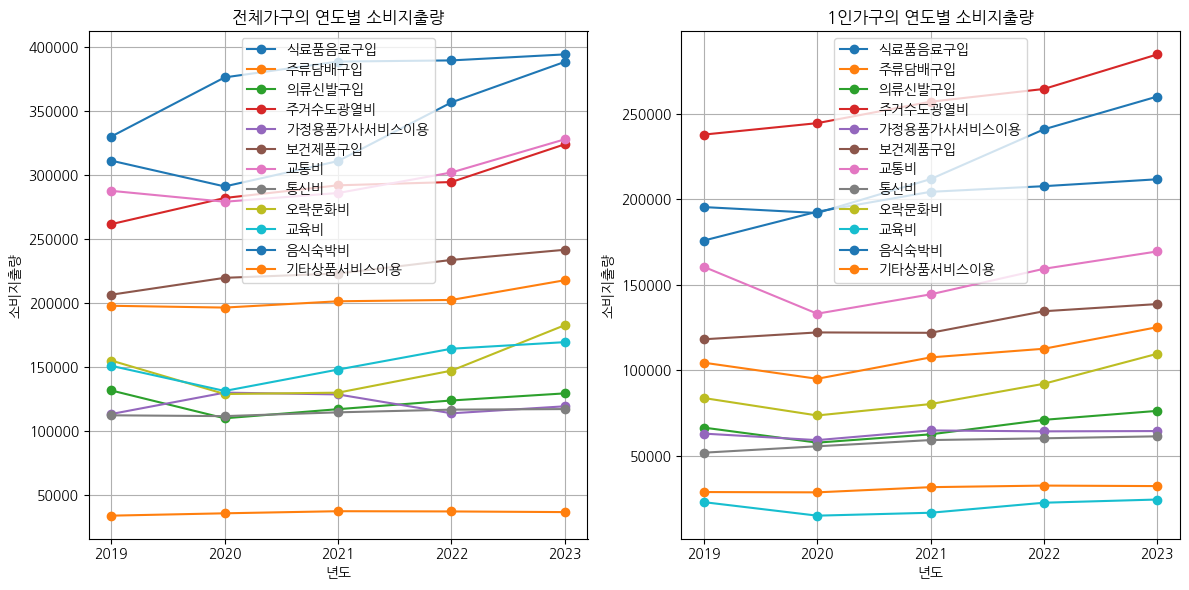

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = "../data/가구유형별소득소비지출금액.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 가구 유형과 카테고리 설정
household_types = ['전체가구', '1인가구']
categories = [
    '식료품음료구입', '주류담배구입', '의류신발구입', '주거수도광열비', '가정용품가사서비스이용',
    '보건제품구입', '교통비', '통신비', '오락문화비', '교육비', '음식숙박비', '기타상품서비스이용'
]

# 연도별 각 가구 유형과 카테고리의 소비지출량 계산
years = df['년도'].unique()
expenses_by_category = {household_type: {category: [] for category in categories} for household_type in household_types}

for household_type in household_types:
    for category in categories:
        for year in years:
            year_data = df[(df['년도'] == year) & (df['가계수지항목'] == household_type)]
            total_expense = year_data.sum(axis=0)[category]
            expenses_by_category[household_type][category].append(total_expense)

# 전체가구에 대한 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for category, expenses in expenses_by_category['전체가구'].items():
    plt.plot(list(years), expenses, marker='o', label=category)
plt.title('전체가구의 연도별 소비지출량')
plt.xlabel('년도')
plt.ylabel('소비지출량')
plt.legend()
plt.grid(True)
plt.xticks(range(min(years), max(years)+1, 1))  # 가로축 눈금을 1년 단위로 설정

# 1인가구에 대한 그래프
plt.subplot(1, 2, 2)
for category, expenses in expenses_by_category['1인가구'].items():
    plt.plot(list(years), expenses, marker='o', label=category)
plt.title('1인가구의 연도별 소비지출량')
plt.xlabel('년도')
plt.ylabel('소비지출량')
plt.legend()
plt.grid(True)
plt.xticks(range(min(years), max(years)+1, 1))  # 가로축 눈금을 1년 단위로 설정

# 그래프 출력
plt.tight_layout()
plt.show()


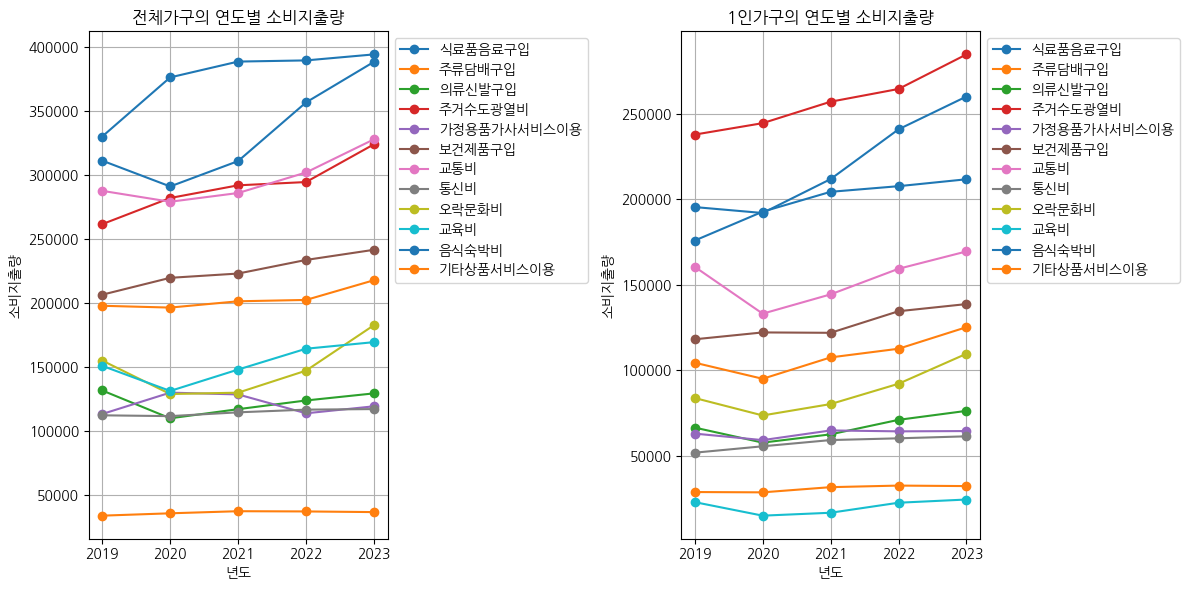

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = "../data/가구유형별소득소비지출금액.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 가구 유형과 카테고리 설정
household_types = ['전체가구', '1인가구']
categories = [
    '식료품음료구입', '주류담배구입', '의류신발구입', '주거수도광열비', '가정용품가사서비스이용',
    '보건제품구입', '교통비', '통신비', '오락문화비', '교육비', '음식숙박비', '기타상품서비스이용'
]

# 연도별 각 가구 유형과 카테고리의 소비지출량 계산
years = df['년도'].unique()
expenses_by_category = {household_type: {category: [] for category in categories} for household_type in household_types}

for household_type in household_types:
    for category in categories:
        for year in years:
            year_data = df[(df['년도'] == year) & (df['가계수지항목'] == household_type)]
            total_expense = year_data.sum(axis=0)[category]
            expenses_by_category[household_type][category].append(total_expense)

# 전체가구에 대한 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for category, expenses in expenses_by_category['전체가구'].items():
    plt.plot(list(years), expenses, marker='o', label=category)
plt.title('전체가구의 연도별 소비지출량')
plt.xlabel('년도')
plt.ylabel('소비지출량')
plt.grid(True)
plt.xticks(range(min(years), max(years)+1, 1))  # 가로축 눈금을 1년 단위로 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 레전드를 그래프 바깥쪽 오른쪽 상단에 표시

# 1인가구에 대한 그래프
plt.subplot(1, 2, 2)
for category, expenses in expenses_by_category['1인가구'].items():
    plt.plot(list(years), expenses, marker='o', label=category)
plt.title('1인가구의 연도별 소비지출량')
plt.xlabel('년도')
plt.ylabel('소비지출량')
plt.grid(True)
plt.xticks(range(min(years), max(years)+1, 1))  # 가로축 눈금을 1년 단위로 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 레전드를 그래프 바깥쪽 오른쪽 상단에 표시

# 그래프 출력
plt.tight_layout()
plt.show()


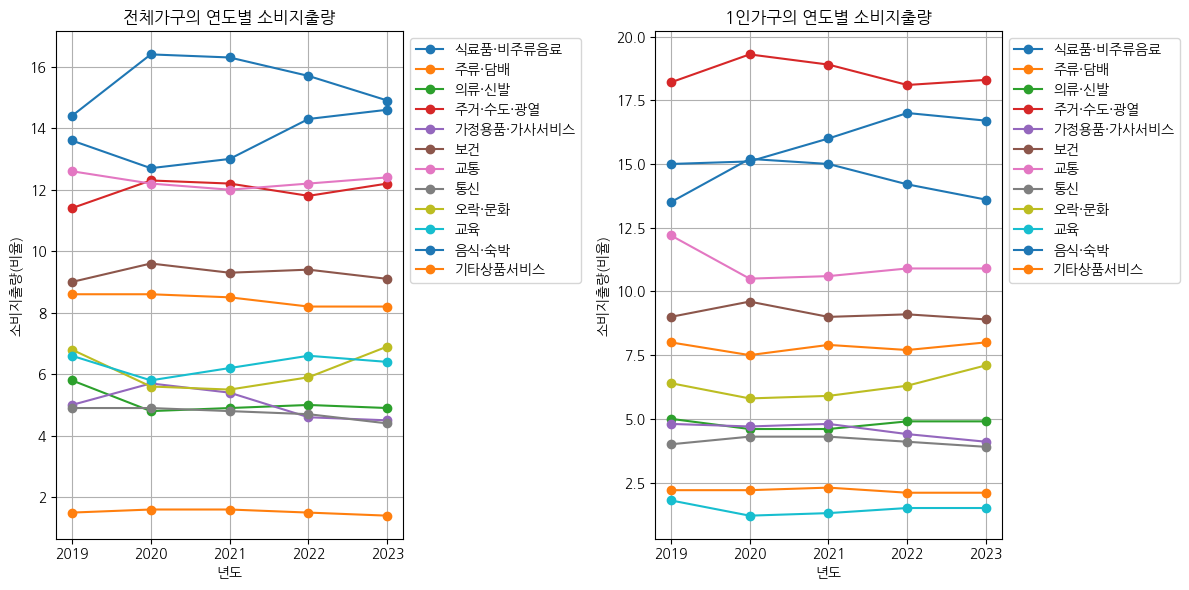

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = "../data/가구유형별소득소비지출현황.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path, encoding='cp949')

# 가구 유형과 카테고리 설정
household_types = ['전체가구', '1인가구']
categories = [
    '식료품·비주류음료','주류·담배','의류·신발','주거·수도·광열','가정용품·가사서비스','보건','교통','통신','오락·문화','교육','음식·숙박','기타상품서비스'
]

# 연도별 각 가구 유형과 카테고리의 소비지출량 계산
years = df['년도'].unique()
expenses_by_category = {household_type: {category: [] for category in categories} for household_type in household_types}

for household_type in household_types:
    for category in categories:
        for year in years:
            year_data = df[(df['년도'] == year) & (df['가계수지항목'] == household_type)]
            total_expense = year_data.sum(axis=0)[category]
            expenses_by_category[household_type][category].append(total_expense)

# 전체가구에 대한 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for category, expenses in expenses_by_category['전체가구'].items():
    plt.plot(list(years), expenses, marker='o', label=category)
plt.title('전체가구의 연도별 소비지출량')
plt.xlabel('년도')
plt.ylabel('소비지출량(비율)')
plt.grid(True)
plt.xticks(range(min(years), max(years)+1, 1))  # 가로축 눈금을 1년 단위로 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 레전드를 그래프 바깥쪽 오른쪽 상단에 표시

# 1인가구에 대한 그래프
plt.subplot(1, 2, 2)
for category, expenses in expenses_by_category['1인가구'].items():
    plt.plot(list(years), expenses, marker='o', label=category)
plt.title('1인가구의 연도별 소비지출량')
plt.xlabel('년도')
plt.ylabel('소비지출량(비율)')
plt.grid(True)
plt.xticks(range(min(years), max(years)+1, 1))  # 가로축 눈금을 1년 단위로 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 레전드를 그래프 바깥쪽 오른쪽 상단에 표시

# 그래프 출력
plt.tight_layout()
plt.show()


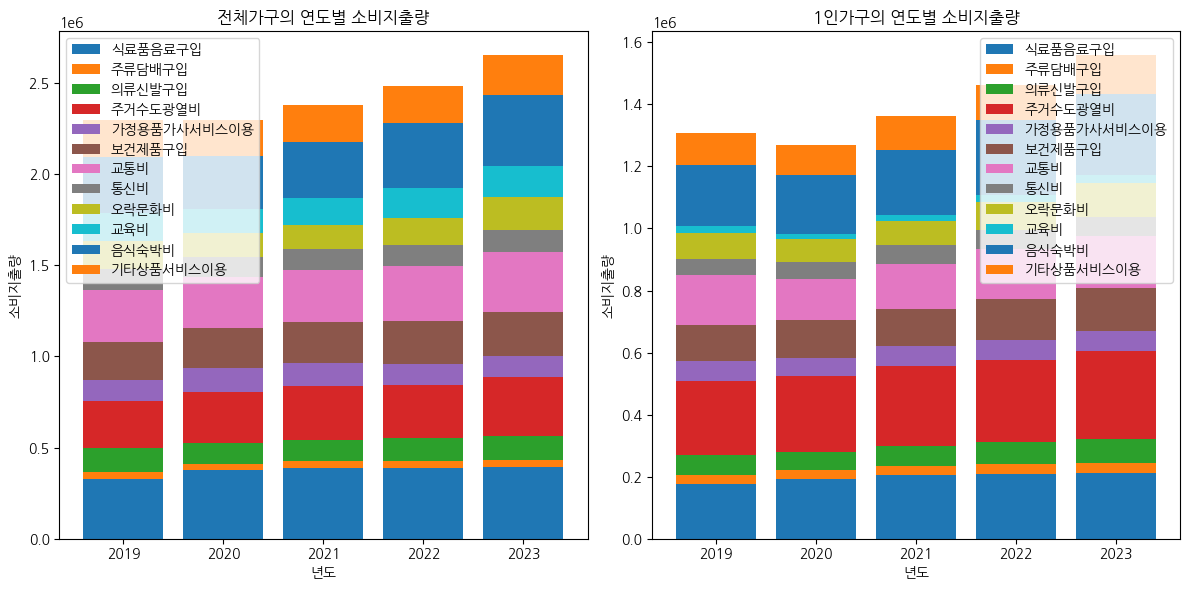

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = "../data/가구유형별소득소비지출금액.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 가구 유형과 카테고리 설정
household_types = ['전체가구', '1인가구']
categories = [
    '식료품음료구입', '주류담배구입', '의류신발구입', '주거수도광열비', '가정용품가사서비스이용',
    '보건제품구입', '교통비', '통신비', '오락문화비', '교육비', '음식숙박비', '기타상품서비스이용'
]

# 연도별 각 가구 유형과 카테고리의 소비지출량 계산
years = df['년도'].unique()
expenses_by_category = {household_type: {category: [] for category in categories} for household_type in household_types}

for household_type in household_types:
    for category in categories:
        for year in years:
            year_data = df[(df['년도'] == year) & (df['가계수지항목'] == household_type)]
            total_expense = year_data.sum(axis=0)[category]
            expenses_by_category[household_type][category].append(total_expense)

# 막대그래프로 표시
plt.figure(figsize=(12, 6))

# 전체가구에 대한 막대그래프
plt.subplot(1, 2, 1)
bottom = None
for category in categories:
    expenses = expenses_by_category['전체가구'][category]
    plt.bar(list(years), expenses, label=category, bottom=bottom)
    if bottom is None:
        bottom = expenses
    else:
        bottom = [bottom[i] + expenses[i] for i in range(len(expenses))]
plt.title('전체가구의 연도별 소비지출량')
plt.xlabel('년도')
plt.ylabel('소비지출량')
plt.xticks(range(min(years), max(years)+1, 1))  # 가로축 눈금을 1년 단위로 설정
plt.legend()

# 1인가구에 대한 막대그래프
plt.subplot(1, 2, 2)
bottom = None
for category in categories:
    expenses = expenses_by_category['1인가구'][category]
    plt.bar(list(years), expenses, label=category, bottom=bottom)
    if bottom is None:
        bottom = expenses
    else:
        bottom = [bottom[i] + expenses[i] for i in range(len(expenses))]
plt.title('1인가구의 연도별 소비지출량')
plt.xlabel('년도')
plt.ylabel('소비지출량')
plt.xticks(range(min(years), max(years)+1, 1))  # 가로축 눈금을 1년 단위로 설정
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


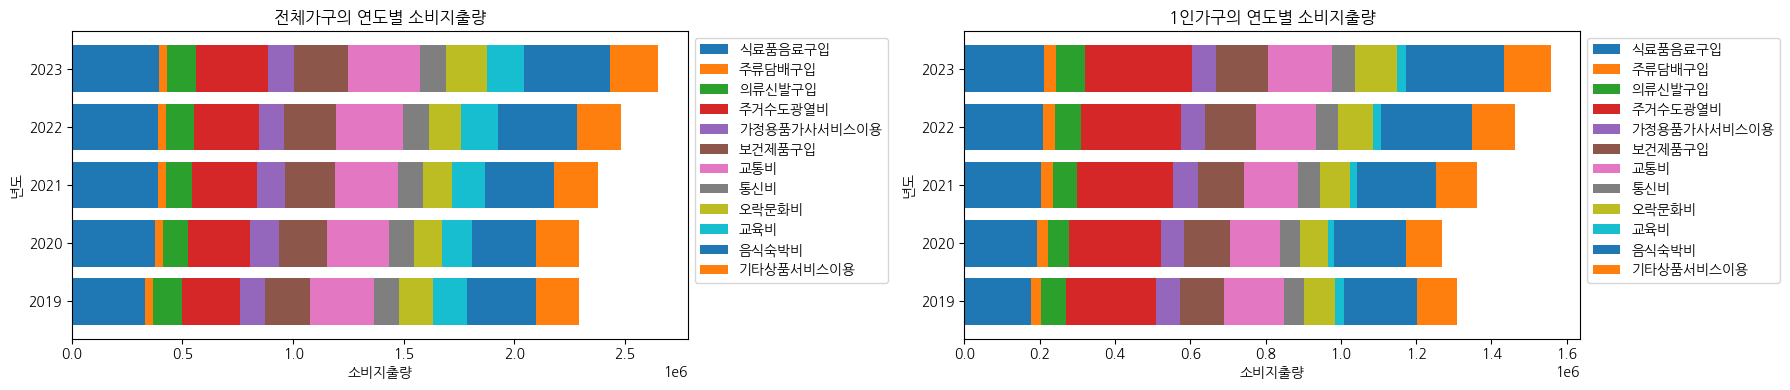

In [63]:
# 막대그래프로 표시
plt.figure(figsize=(18, 4))

# 전체가구에 대한 가로 막대그래프
plt.subplot(1, 2, 1)
bottom = None
for category in categories:
    expenses = expenses_by_category['전체가구'][category]
    plt.barh(list(years), expenses, label=category, left=bottom)
    if bottom is None:
        bottom = expenses
    else:
        bottom = [bottom[i] + expenses[i] for i in range(len(expenses))]
plt.title('전체가구의 연도별 소비지출량')
plt.xlabel('소비지출량')
plt.ylabel('년도')
plt.yticks(range(min(years), max(years)+1, 1))  # 세로축 눈금을 1년 단위로 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 레전드를 바깥쪽 오른쪽 상단에 표시

# 1인가구에 대한 가로 막대그래프
plt.subplot(1, 2, 2)
bottom = None
for category in categories:
    expenses = expenses_by_category['1인가구'][category]
    plt.barh(list(years), expenses, label=category, left=bottom)
    if bottom is None:
        bottom = expenses
    else:
        bottom = [bottom[i] + expenses[i] for i in range(len(expenses))]
plt.title('1인가구의 연도별 소비지출량')
plt.xlabel('소비지출량')
plt.ylabel('년도')
plt.yticks(range(min(years), max(years)+1, 1))  # 세로축 눈금을 1년 단위로 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 레전드를 바깥쪽 오른쪽 상단에 표시

# 그래프 출력
plt.tight_layout()
plt.show()


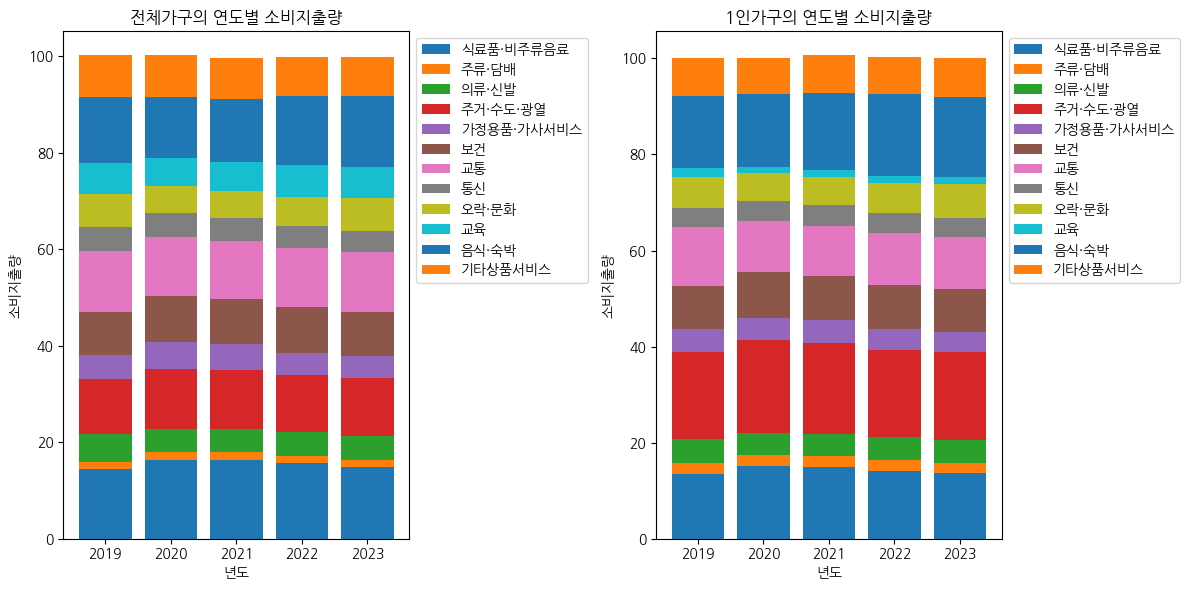

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = "../data/가구유형별소득소비지출현황.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path, encoding='cp949')

# 가구 유형과 카테고리 설정
household_types = ['전체가구', '1인가구']
categories = [
    '식료품·비주류음료','주류·담배','의류·신발','주거·수도·광열','가정용품·가사서비스','보건','교통','통신','오락·문화','교육','음식·숙박','기타상품서비스'
]

# 연도별 각 가구 유형과 카테고리의 소비지출량 계산
years = df['년도'].unique()
expenses_by_category = {household_type: {category: [] for category in categories} for household_type in household_types}

for household_type in household_types:
    for category in categories:
        for year in years:
            year_data = df[(df['년도'] == year) & (df['가계수지항목'] == household_type)]
            total_expense = year_data.sum(axis=0)[category]
            expenses_by_category[household_type][category].append(total_expense)

# 막대그래프로 표시
plt.figure(figsize=(12, 6))

# 전체가구에 대한 막대그래프
plt.subplot(1, 2, 1)
bottom = None
for category in categories:
    expenses = expenses_by_category['전체가구'][category]
    plt.bar(list(years), expenses, label=category, bottom=bottom)
    if bottom is None:
        bottom = expenses
    else:
        bottom = [bottom[i] + expenses[i] for i in range(len(expenses))]
plt.title('전체가구의 연도별 소비지출량')
plt.xlabel('년도')
plt.ylabel('소비지출량')
plt.xticks(range(min(years), max(years)+1, 1))  # 가로축 눈금을 1년 단위로 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 레전드를 바깥쪽 오른쪽 상단에 표시

# 1인가구에 대한 막대그래프
plt.subplot(1, 2, 2)
bottom = None
for category in categories:
    expenses = expenses_by_category['1인가구'][category]
    plt.bar(list(years), expenses, label=category, bottom=bottom)
    if bottom is None:
        bottom = expenses
    else:
        bottom = [bottom[i] + expenses[i] for i in range(len(expenses))]
plt.title('1인가구의 연도별 소비지출량')
plt.xlabel('년도')
plt.ylabel('소비지출량')
plt.xticks(range(min(years), max(years)+1, 1))  # 가로축 눈금을 1년 단위로 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 레전드를 바깥쪽 오른쪽 상단에 표시

# 그래프 출력
plt.tight_layout()
plt.show()


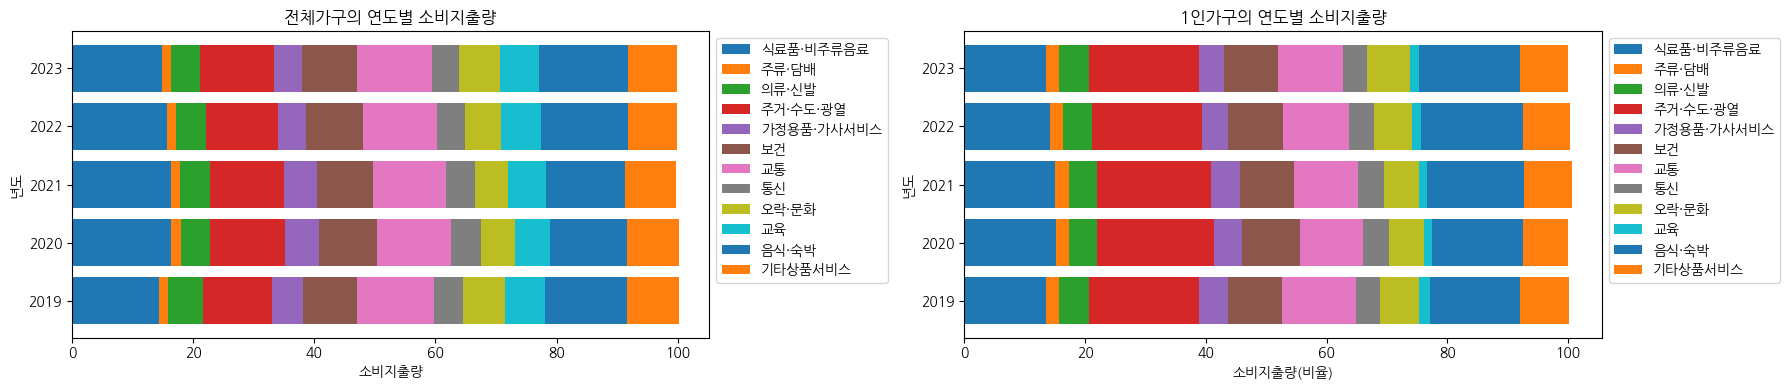

In [66]:
# 막대그래프로 표시
plt.figure(figsize=(18, 4))

# 전체가구에 대한 가로 막대그래프
plt.subplot(1, 2, 1)
bottom = None
for category in categories:
    expenses = expenses_by_category['전체가구'][category]
    plt.barh(list(years), expenses, label=category, left=bottom)
    if bottom is None:
        bottom = expenses
    else:
        bottom = [bottom[i] + expenses[i] for i in range(len(expenses))]
plt.title('전체가구의 연도별 소비지출량')
plt.xlabel('소비지출량')
plt.ylabel('년도')
plt.yticks(range(min(years), max(years)+1, 1))  # 세로축 눈금을 1년 단위로 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 레전드를 바깥쪽 오른쪽 상단에 표시

# 1인가구에 대한 가로 막대그래프
plt.subplot(1, 2, 2)
bottom = None
for category in categories:
    expenses = expenses_by_category['1인가구'][category]
    plt.barh(list(years), expenses, label=category, left=bottom)
    if bottom is None:
        bottom = expenses
    else:
        bottom = [bottom[i] + expenses[i] for i in range(len(expenses))]
plt.title('1인가구의 연도별 소비지출량')
plt.xlabel('소비지출량(비율)')
plt.ylabel('년도')
plt.yticks(range(min(years), max(years)+1, 1))  # 세로축 눈금을 1년 단위로 설정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 레전드를 바깥쪽 오른쪽 상단에 표시

# 그래프 출력
plt.tight_layout()
plt.show()


In [11]:
ratio = df.copy()

In [12]:
ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   년도          10 non-null     int64  
 1   가계수지항목      10 non-null     object 
 2   소비지출(천원)    10 non-null     int64  
 3   식료품·비주류음료   10 non-null     float64
 4   주류·담배       10 non-null     float64
 5   의류·신발       10 non-null     float64
 6   주거·수도·광열    10 non-null     float64
 7   가정용품·가사서비스  10 non-null     float64
 8   보건          10 non-null     float64
 9   교통          10 non-null     float64
 10  통신          10 non-null     float64
 11  오락·문화       10 non-null     float64
 12  교육          10 non-null     float64
 13  음식·숙박       10 non-null     float64
 14  기타상품서비스     10 non-null     float64
dtypes: float64(12), int64(2), object(1)
memory usage: 1.3+ KB


In [13]:
# ratio["년도"] = ratio["년도"].astype(object)

In [14]:
#전체가구의 소비지출 비율
total_expend = ratio[ratio["가계수지항목"]=="전체가구"]
total_gagu = ratio[ratio["가계수지항목"]=="전체가구"][["년도","소비지출(천원)"]]
# total_expend = total_gagu["소비지출(천원)"]
pd.DataFrame(total_gagu)

,년도,소비지출(천원)
0,2019,2295
2,2020,2295
4,2021,2380
6,2022,2484
8,2023,2651


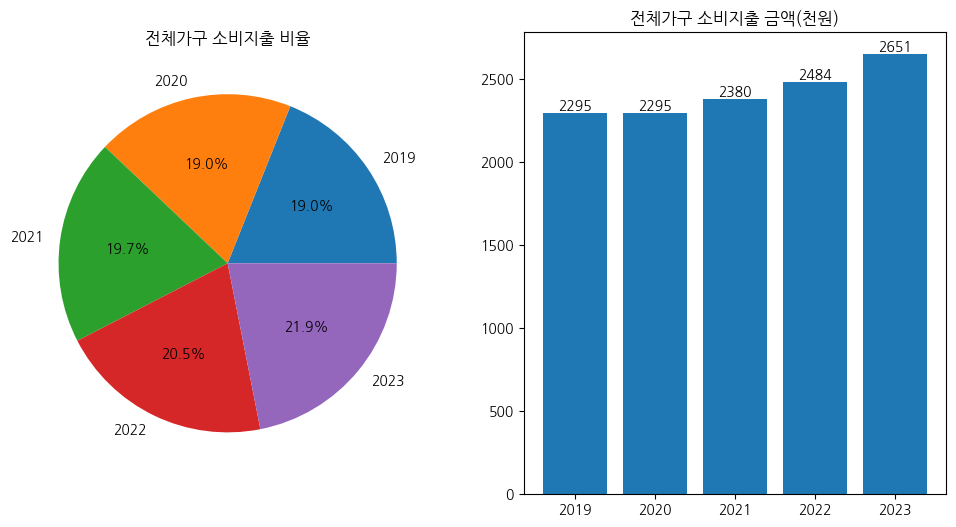

In [15]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.pie(total_gagu["소비지출(천원)"], labels=total_gagu["년도"], autopct='%1.1f%%')
# total_expend.plot(kind='pie', autopct='%1.1f%%\n', fontsize=12)  # 수정: autopct 형식과 fontsize를 조정하여 텍스트 크기 조절
plt.title('전체가구 소비지출 비율')

plt.subplot(1,2,2)
bars = plt.bar(total_gagu["년도"],total_gagu["소비지출(천원)"] )
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.title('전체가구 소비지출 금액(천원)')


plt.show()

In [16]:
pwd

'/content/drive/MyDrive/mulcam_bigdata/세미프로젝트/data'

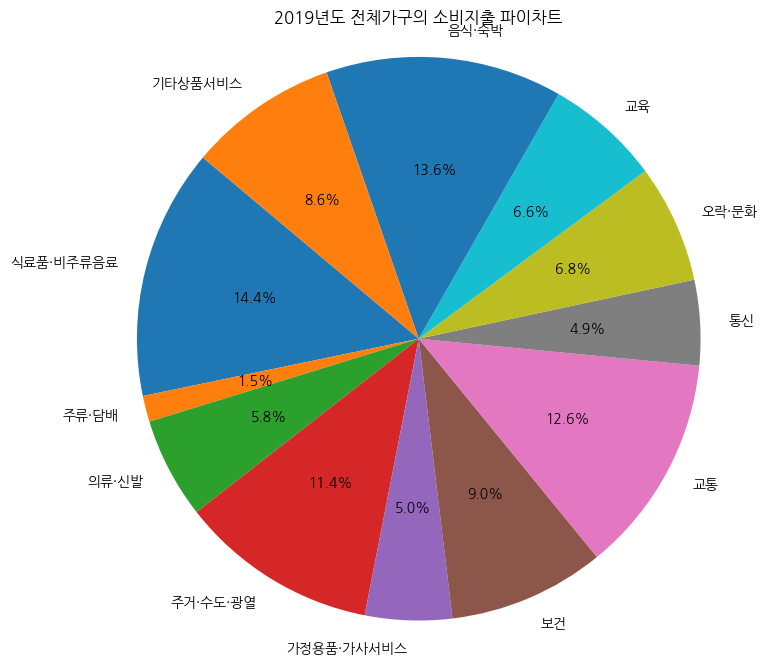

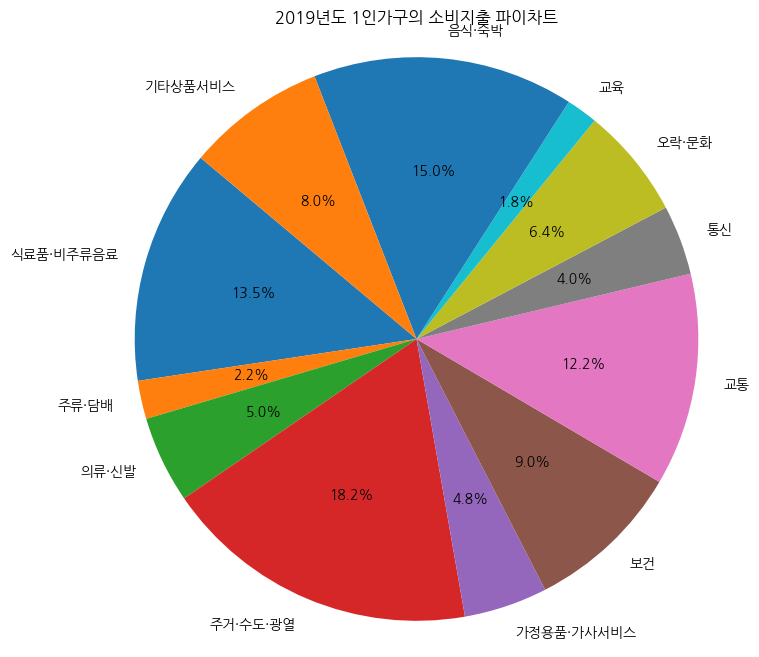

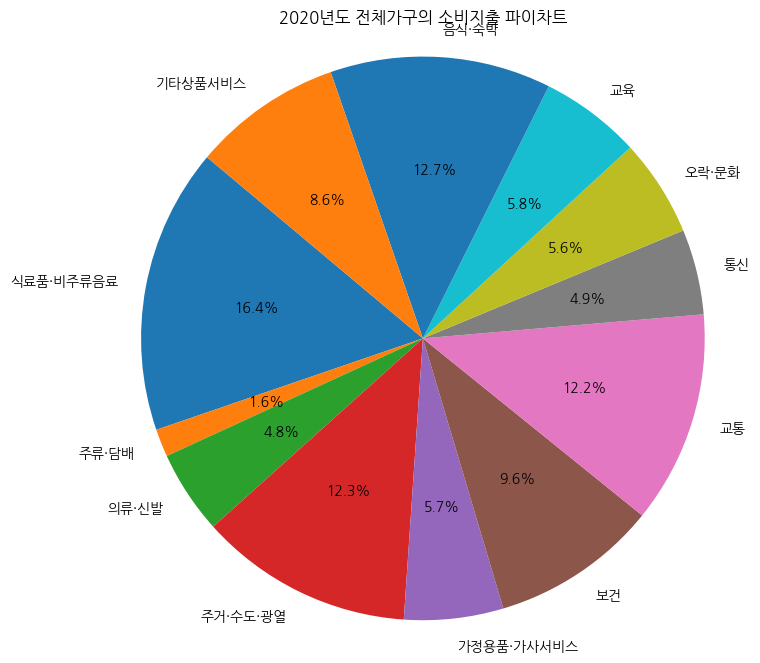

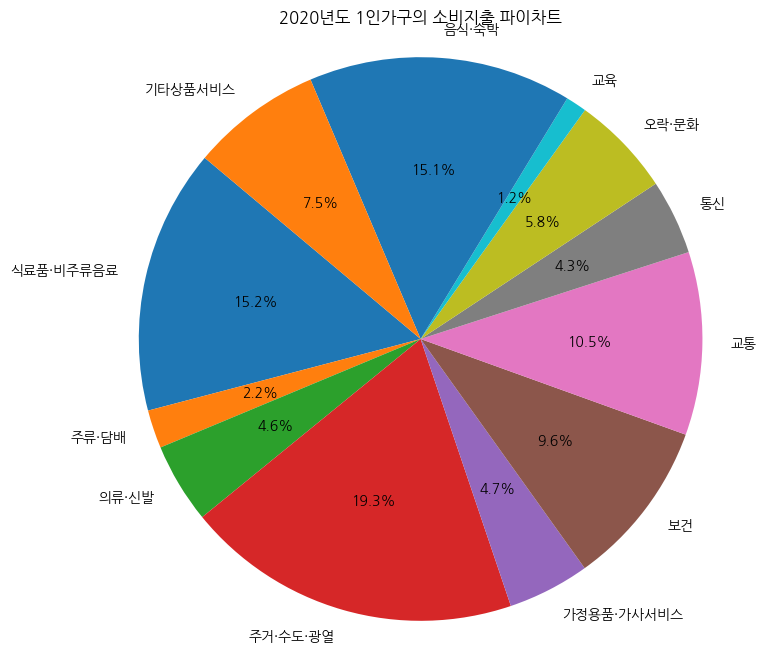

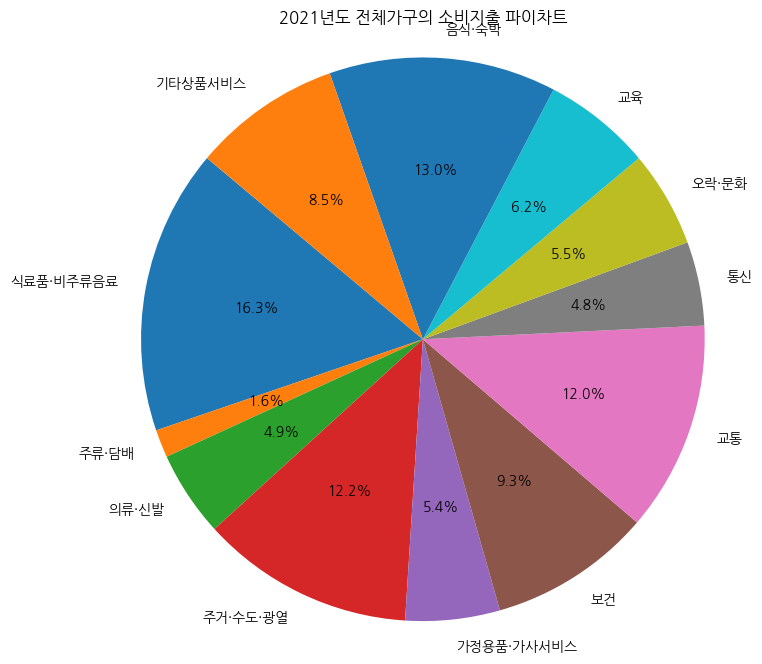

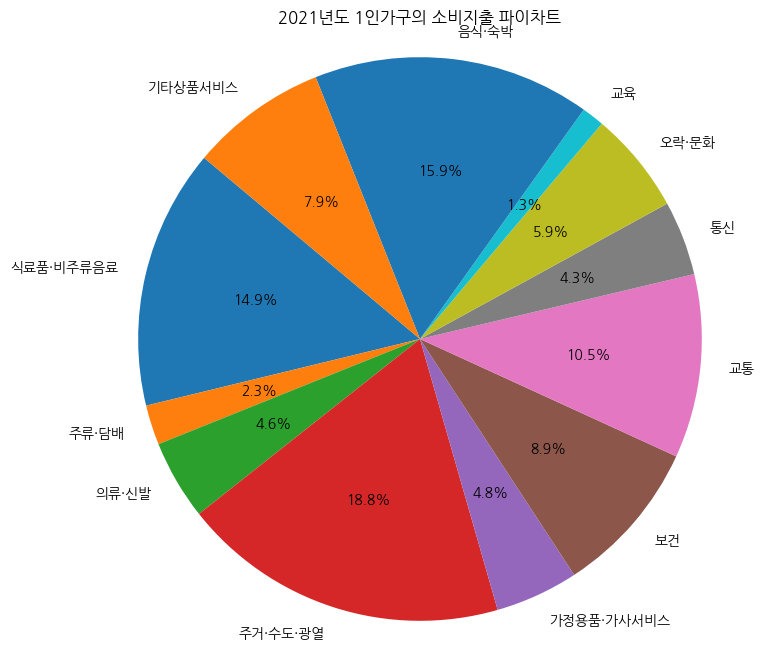

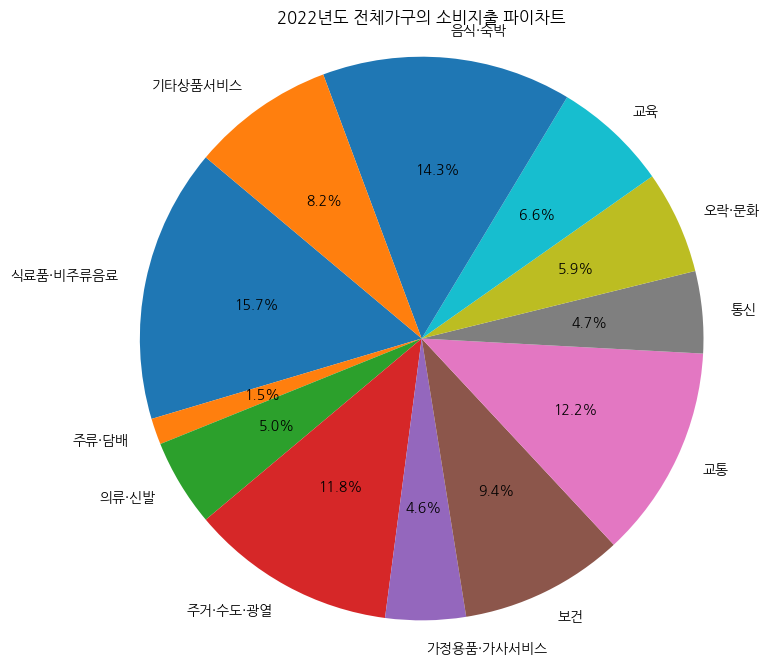

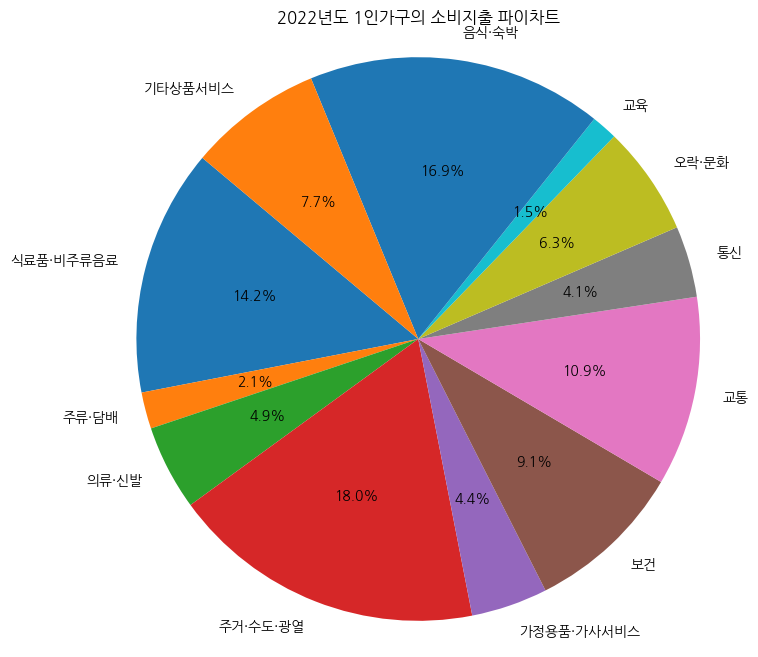

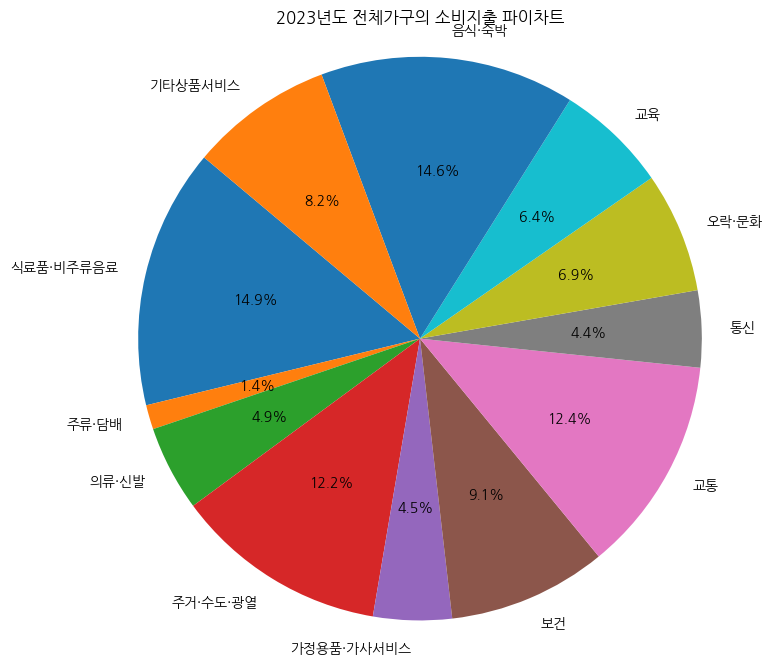

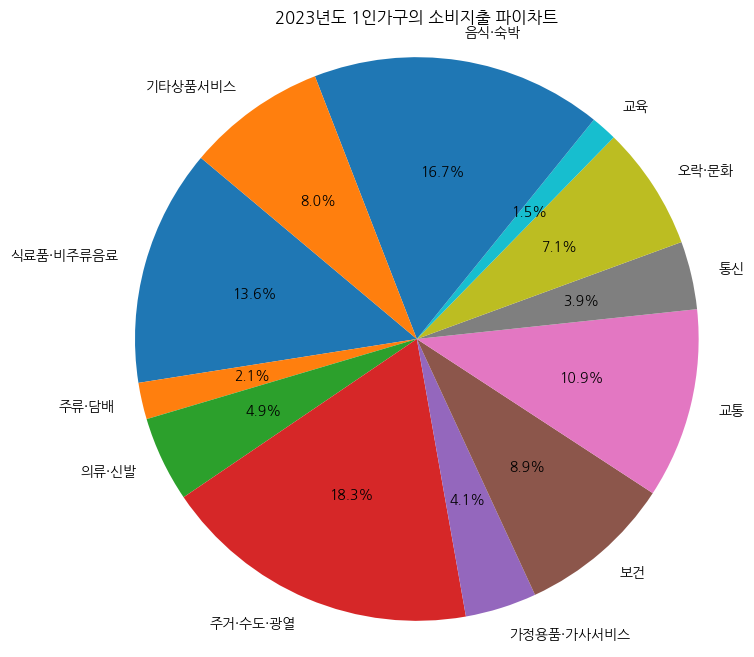

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 불러오기
file_path = '../data/가구유형별소득소비지출현황.csv'
data = pd.read_csv(file_path, encoding='cp949')

# 각 년도별, 가구별 파이차트 생성
years = ['2019', '2020', '2021', '2022', '2023']
households = ['전체가구', '1인가구']

for year in years:
    for household in households:
        # 해당 년도, 가구 유형 데이터 선택
        subset = data[(data['년도'] == int(year)) & (data['가계수지항목'] == household)]
        labels = subset.columns[3:]  # 소비지출 항목
        values = subset.iloc[0, 3:]  # 소비지출 값

        # 파이차트 생성
        plt.figure(figsize=(8, 8))
        plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')  # 원형 모양으로 조정
        plt.title(f'{year}년도 {household}의 소비지출 파이차트')
        plt.show()

CSV 파일의 경로를 입력하세요: ../data/가구유형별소득소비지출현황.csv
조회할 년도를 입력하세요 (2019~2023): 2019
조회할 가구 유형을 입력하세요 (전체가구 또는 1인가구): 1인가구


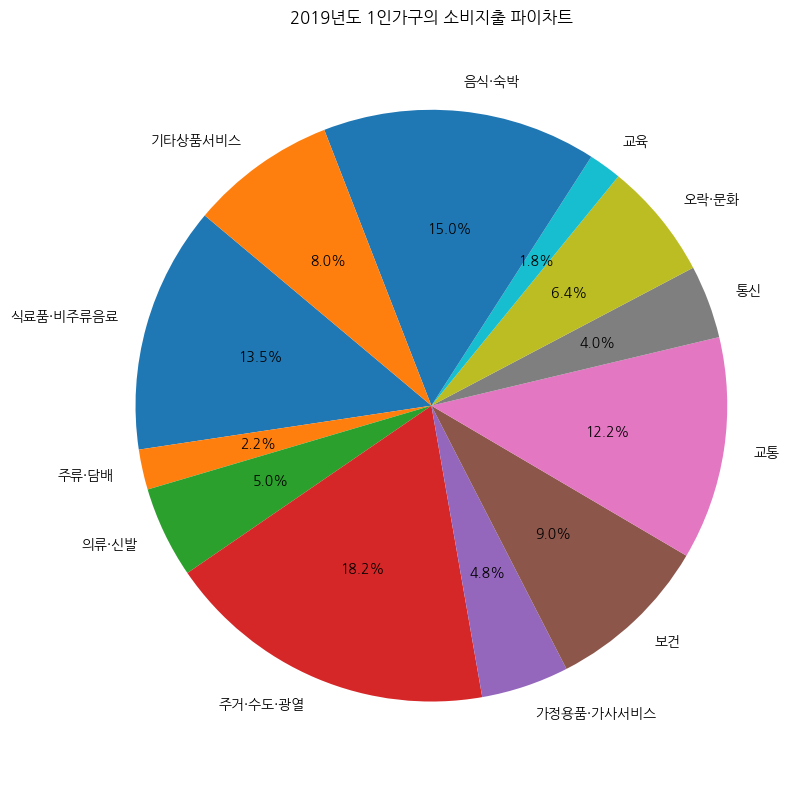

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def create_pie_chart(data, year, household):
    # 해당 년도, 가구 유형 데이터 선택
    subset = data[(data['년도'] == year) & (data['가계수지항목'] == household)]
    labels = subset.columns[3:]  # 소비지출 항목
    values = subset.iloc[0, 3:]  # 소비지출 값

    # 파이차트 생성
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # 원형 모양으로 조정
    plt.title(f'{year}년도 {household}의 소비지출 파이차트')
    plt.tight_layout()
    plt.show()

# CSV 파일에서 데이터 불러오기
file_path = input("CSV 파일의 경로를 입력하세요: ")
data = pd.read_csv(file_path, encoding='cp949')

# 사용자로부터 년도와 가구 유형 입력 받기
year_input = int(input("조회할 년도를 입력하세요 (2019~2023): "))
household_input = input("조회할 가구 유형을 입력하세요 (전체가구 또는 1인가구): ")

# 함수 호출
create_pie_chart(data, year_input, household_input)


CSV 파일의 경로를 입력하세요: ../data/가구유형별소득소비지출현황.csv
조회할 년도를 입력하세요 (2019~2023): 2019
조회할 가구 유형을 입력하세요 (전체가구 또는 1인가구): 1인가구


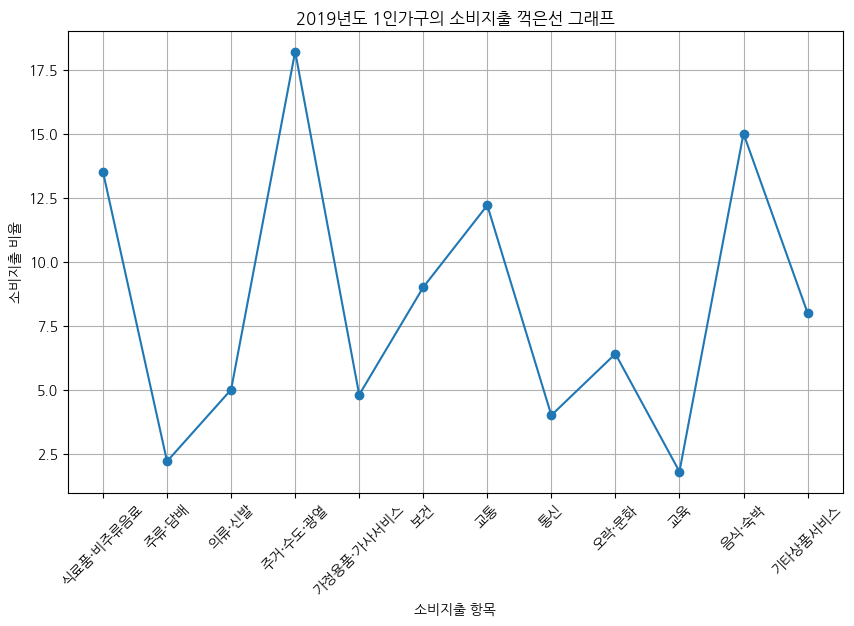

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def create_line_chart(data, year, household):
    # 해당 년도, 가구 유형 데이터 선택
    subset = data[(data['년도'] == year) & (data['가계수지항목'] == household)]
    labels = subset.columns[3:]  # 소비지출 항목
    values = subset.iloc[0, 3:]  # 소비지출 값

    # 꺽은선 그래프 생성
    plt.figure(figsize=(10, 6))
    plt.plot(labels, values, marker='o', linestyle='-')
    plt.title(f'{year}년도 {household}의 소비지출 꺽은선 그래프')
    plt.xlabel('소비지출 항목')
    plt.ylabel('소비지출 비율')
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.grid(True)  # 격자 표시
    plt.show()

# CSV 파일에서 데이터 불러오기
file_path = input("CSV 파일의 경로를 입력하세요: ")
data = pd.read_csv(file_path, encoding='cp949')

# 사용자로부터 년도와 가구 유형 입력 받기
year_input = int(input("조회할 년도를 입력하세요 (2019~2023): "))
household_input = input("조회할 가구 유형을 입력하세요 (전체가구 또는 1인가구): ")

# 함수 호출
create_line_chart(data, year_input, household_input)


In [20]:
# col = [['2019','2019','2020','2020','2021','2021','2022','2022','2023','2023'],['전체가구','1인가구','전체가구','1인가구','전체가구','1인가구','전체가구','1인가구','전체가구','1인가구']]
# ind = ['소비지출','식료품음료구입','주류담배구입','의류신발구입','주거수도광열비','가정용품가사서비스이용','보건제품구입','교통비','통신비','오락문화비','교육비','음식숙박비','기타상품서비스이용']

# content = []

# for i in range(len(ind)):
#     temp = []
#     for j in range(len(col[0])):
#         temp.append(f'tot_{ind[i]}_mean_{col[0][j]}')
#         temp.append(f'sin_tot_{ind[i]}_mean_{col[0][j]}')
#     content.append(temp)


In [21]:
# content